In [5]:
from resources.helper.helper_dataset import get_dataloaders_mnist
from resources.helper.helper_evaluation import set_all_seeds, set_deterministic
from resources.helper.helper_train import train_model
from resources.helper.helper_plotting import plot_training_loss, plot_accuracy, show_examples

import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [7]:
resize_transform = torchvision.transforms.Compose(
    [torchvision.transforms.Resize((32, 32)),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,), (0.5,))])

train_loader, valid_loader, test_loader = get_dataloaders_mnist(batch_size=256,validation_fraction=0.1, 
                                                                train_transforms=resize_transform,test_transforms=resize_transform)

In [8]:
set_all_seeds(42)

In [9]:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 32, 32])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([7, 9, 7, 1, 8, 4, 1, 0, 3, 7])


In [18]:
class Lenet_5(torch.nn.Module):
    def __init__(self,classes, grayscale=False):
        super().__init__()
        self.classes=classes
        if grayscale==False:
            channels=3
        else:
            channels=1
        
        self.features=torch.nn.Sequential(
            torch.nn.Conv2d(channels, 6, kernel_size=5),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(6, 16, kernel_size=5),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=2)
            )
        
        self.classifier=torch.nn.Sequential(
            torch.nn.Linear(16*5*5,120),
            torch.nn.Tanh(),
            torch.nn.Linear(120,84),
            torch.nn.Tanh(),
            torch.nn.Linear(84,classes),

        )

    def forward(self, x):
        x=self.features(x)
        x_flatten=torch.flatten(x,1)
        logits=self.classifier(x_flatten)
        return logits

Epoch: 001/005 | Batch 0000/0210 | Loss: 2.2986
Epoch: 001/005 | Batch 0050/0210 | Loss: 1.1612
Epoch: 001/005 | Batch 0100/0210 | Loss: 0.5487
Epoch: 001/005 | Batch 0150/0210 | Loss: 0.3139
Epoch: 001/005 | Batch 0200/0210 | Loss: 0.3005
Epoch: 001/005 | Train: 92.99% | Validation: 94.53%
Time elapsed: 0.45 min
Last lr:  [0.1]
Epoch: 002/005 | Batch 0000/0210 | Loss: 0.2498
Epoch: 002/005 | Batch 0050/0210 | Loss: 0.1616
Epoch: 002/005 | Batch 0100/0210 | Loss: 0.2251
Epoch: 002/005 | Batch 0150/0210 | Loss: 0.1552
Epoch: 002/005 | Batch 0200/0210 | Loss: 0.1833
Epoch: 002/005 | Train: 96.10% | Validation: 97.00%
Time elapsed: 0.89 min
Last lr:  [0.1]
Epoch: 003/005 | Batch 0000/0210 | Loss: 0.1860
Epoch: 003/005 | Batch 0050/0210 | Loss: 0.1179
Epoch: 003/005 | Batch 0100/0210 | Loss: 0.0761
Epoch: 003/005 | Batch 0150/0210 | Loss: 0.0914
Epoch: 003/005 | Batch 0200/0210 | Loss: 0.1355
Epoch: 003/005 | Train: 97.10% | Validation: 97.62%
Time elapsed: 1.36 min
Last lr:  [0.1]
Epoch: 

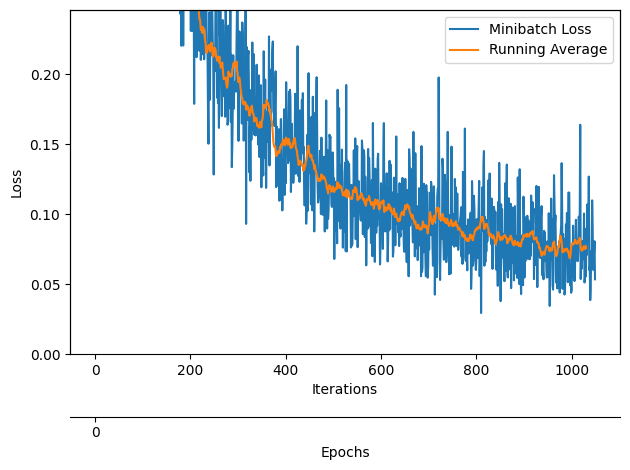

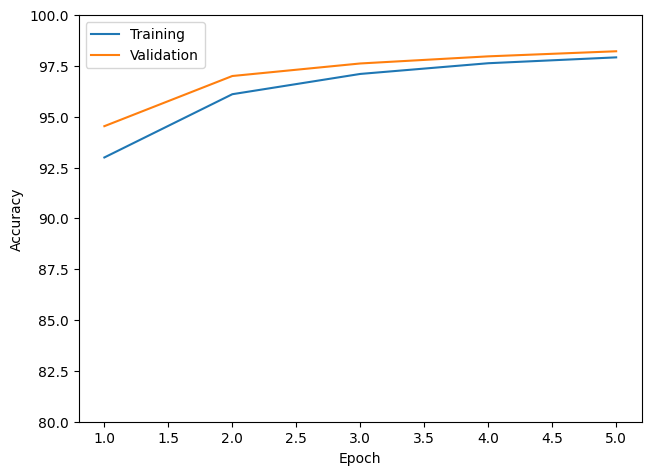

In [19]:
model=Lenet_5(10,grayscale=True)
model=model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.1, mode='max')
Epochs=5
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=Epochs,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=device,
    logging_interval=50,
    scheduler=scheduler,
    scheduler_on='valid_acc')

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=Epochs,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()

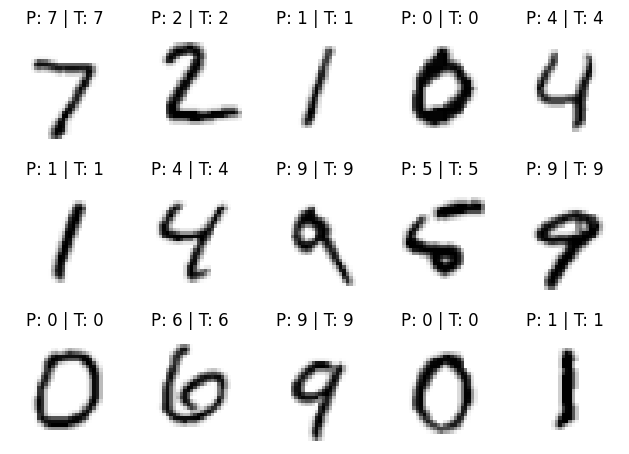

In [20]:
show_examples(model=model, data_loader=test_loader)

In [21]:
#saving model
torch.save(model.state_dict(), 'resources/saved_model/lenet_5.pt')
torch.save(optimizer.state_dict(), 'resources/saved_model/optimizer.pt')
torch.save(scheduler.state_dict(), 'resources/saved_model/scheduler.pt')

In [23]:
#loading model
model.load_state_dict(torch.load('resources/saved_model/lenet_5.pt'))
optimizer.load_state_dict(torch.load('resources/saved_model//optimizer.pt'))
scheduler.load_state_dict(torch.load('resources/saved_model/scheduler.pt'))

In [ ]:
class_dict={
   0:'0',
   1:'1',
   2:'2',
   3:'3',
   4:'4',
   5:'5',
   6:'6',
   7:'7',
   8:'8',
   9:'9', 
}
